In [ ]:
"C:\Users\augus\OneDrive\Desktop\js\Cargo predict\Export\Dataset\exporters_with_yearly_data_and_location.csv"

In [3]:
import pandas as pd
from geopy.geocoders import Nominatim

df = pd.read_csv(r"C:\Users\augus\OneDrive\Desktop\js\Cargo predict\Export\Dataset\exporters_with_yearly_data_and_location.csv")

In [4]:
from geopy.geocoders import Nominatim

def get_coordinates(postal_code):
    geolocator = Nominatim(user_agent='my_geocoder')
    location = geolocator.geocode(postal_code)

    if location:
        return location.latitude, location.longitude
    else:
        return None

In [11]:
start_row = 0
end_row = 2773

# Read the CSV file with specified rows
df = pd.read_csv(r"C:\Users\augus\OneDrive\Desktop\js\Cargo predict\Export\Dataset\exporters_with_yearly_data_and_location.csv", skiprows=range(1, start_row), nrows=end_row - start_row + 1)

df['Latitude'] = ''
df['Longitude'] = ''


for index, row in df.iterrows():
    postal_code = row['pin']  
    coordinates = get_coordinates(postal_code)
    if coordinates:
        df.at[index, 'Latitude'] = coordinates[0]
        df.at[index, 'Longitude'] = coordinates[1]
        print(coordinates[0], coordinates[1])
    
df.to_csv('coord.csv', index=False)

12.978761057943926 80.19780987663552
9.54856711111111 76.52230786666667
11.6719252 78.1929386
11.1398791 77.31429145
9.40768399 76.351707025
10.7996557 76.0688529
11.0980518625 77.309765225
10.544403 77.09328762727273
11.28118388372093 77.58956259534884
10.96040589130435 78.06453304347826
13.042568160810811 80.23459210743243
9.592533289090909 76.58230555090908
11.604201301538462 75.60635570307693
9.765011083333333 76.36738138333334
9.957255232894736 76.25402236842105
11.010469648529412 76.95122688088236
8.1852759 77.2497986
9.917652551851852 76.27326455925926
9.82172572 76.30522974
10.087692555555556 76.30506273333334
11.097379925 77.26562055
11.096039183333334 77.27852751666666
9.581621149411765 76.63691744941177
11.1398791 77.31429145
55.2881222 62.45378057999999
10.034164772289158 76.42900358072289
11.1207516 77.335338875
11.135501066666667 77.34238386666667
9.964452433333333 77.46669595
11.197693457142856 77.3648192
11.197693457142856 77.3648192
10.1428569 76.52744881481482
11.0980

In [13]:

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
df=pd.read_csv(r"C:\Users\augus\OneDrive\Desktop\js\Cargo predict\Export\Code\Clean\coord.csv")

In [14]:
df.dropna(subset=['Latitude', 'Longitude'], inplace=True)
X = df[['Latitude', 'Longitude']]

In [17]:
filtered_df = df[(df['Latitude'] >= 6) & (df['Latitude'] <= 14) & (df['Longitude'] >= 50) & (df['Longitude'] <= 84)]
X = filtered_df[['Latitude', 'Longitude']]

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\augus\AppData\Local\Temp\ipykernel_11684\3523463178.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Cluster'] = kmeans.labels_


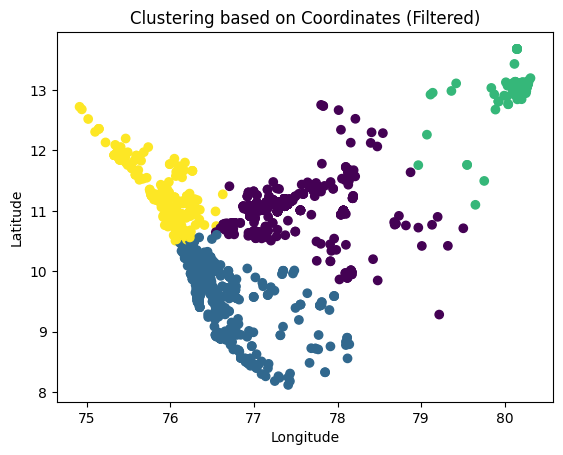

In [19]:

num_clusters =4

# Perform KMeans clustering
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)

# Add cluster labels to the filtered dataframe
filtered_df['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.scatter(filtered_df['Longitude'], filtered_df['Latitude'], c=filtered_df['Cluster'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustering based on Coordinates (Filtered)')
plt.show()

# Save the updated dataframe with cluster labels and filtered data
filtered_df.to_csv('filtered_clustered_coordinates.csv', index=False)

In [23]:
import folium

# Create a Folium map centered around a specific location (e.g., mean latitude and longitude of your data)
mean_latitude = filtered_df['Latitude'].mean()
mean_longitude = filtered_df['Longitude'].mean()
mymap = folium.Map(location=[mean_latitude, mean_longitude], zoom_start=5)

# Define colors for each cluster (you can adjust this based on the number of clusters)
cluster_colors = ['red', 'blue', 'green', 'purple', 'orange']

# Add markers to the map for each data point
for index, row in filtered_df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], 
                  icon=folium.Icon(color=cluster_colors[row['Cluster']]),
                  popup=f'Cluster {row["Cluster"]}').add_to(mymap)

# Save the map as an HTML file
mymap.save('clustered_map-v1.html')

In [21]:
!pip install folium

   ---------------------------------------- 0.0/100.0 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/100.0 kB ? eta -:--:--
   -------------------------------- ------- 81.9/100.0 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 100.0/100.0 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/82.0 kB ? eta -:--:--
   ---------------------------------------- 82.0/82.0 kB ? eta 0:00:00
